# **Proyecto TikTok**
**Curso 5 - Análisis de Regresión: Simplificar relaciones complejas de datos**

Eres un profesional de datos en TikTok. El equipo de datos está trabajando para construir un modelo de aprendizaje automático que pueda utilizarse para determinar si un vídeo contiene una reclamación o si ofrece una opinión. Con un modelo de predicción exitoso, TikTok puede reducir la acumulación de informes de usuarios y priorizarlos de manera más eficiente.

El equipo está cada vez más cerca de completar el proyecto, después de haber completado un plan de acción inicial, el trabajo inicial de codificación Python, EDA, y las pruebas de hipótesis.

El equipo de TikTok ha revisado los resultados de las pruebas de hipótesis. La jefa de operaciones de TikTok, Maika Abadi, está interesada en cómo se asocian las diferentes variables con el hecho de que un usuario sea verificado. Anteriormente, el equipo de datos observó que si un usuario está verificado, es mucho más probable que publique opiniones. Ahora, el equipo de datos ha decidido explorar cómo predecir el estado verificado para ayudarles a entender cómo se relacionan las características del vídeo con los usuarios verificados. Por lo tanto, se le ha pedido que realice una regresión logística utilizando el estado verificado como variable de resultado. Los resultados se pueden utilizar para informar el modelo final relacionado con la predicción de si un vídeo es una afirmación frente a una opinión.

Se ha estructurado y preparado un cuaderno para ayudarle en este proyecto. Por favor, complete las siguientes preguntas.

# **Proyecto fin de curso 5: Modelado de regresión**


En esta actividad, construirás un modelo de regresión logística en Python. Como has aprendido, la regresión logística te ayuda a estimar la probabilidad de un resultado. Para los profesionales de la ciencia de datos, se trata de una habilidad útil porque te permite considerar más de una variable frente a la variable que estás midiendo. Esto abre la puerta a la realización de análisis mucho más exhaustivos y flexibl
<br/>
**El propósito** de este proyecto es demostrar conocimientos de EDA y modelos de regresión.

**El objetivo** es construir un modelo de regresión logística y evaluar el modelo<br/>

*Esta actividad consta de tres partes:*

**Parte 1:** EDA y comprobación de los supuestos del modelo
* ¿Cuáles son algunos de los propósitos del EDA antes de construir un modelo de regresión logística?

**Parte 2:** Construcción y evaluación del modelo
* ¿Qué recursos utiliza para completar esta etapa?

**Parte 3:** Interpretación de los resultados del modelo

* ¿Qué ideas clave se desprenden de su(s) 

* ¿Qué recomendaciones empresariales propones a partir de los modelos construidos?

Siga las instrucciones y responda a la siguiente pregunta para completar la actividad. A continuación, realizará un resumen ejecutivo utilizando las preguntas que figuran en el Documento de Estrategia PACE.

Asegúrese de completar esta actividad antes de continuar. El siguiente punto del curso te proporcionará un modelo completado para que lo compares con tu propio trabajo.
modelo(s)?
.
es.o.o.

# **Construir un modelo de regresión**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

A lo largo de estos cuadernos de proyecto, verás referencias al marco de resolución de problemas PACE. Los siguientes componentes del cuaderno están etiquetados con la etapa PACE correspondiente: Planificar, Analizar, Construir y Ejecutar.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la fase del Plan.

### **Tarea 1. Importación y carga**
Importa los datos y paquetes que has aprendido que son necesarios para construir modelos de regresión.

In [1]:
# Importar paquetes para manipulación de datos
import pandas as pd
import numpy as np
# Importar paquetes para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt 
# Importar paquetes para preprocesamiento de datos
from sklearn.preprocessing import OneHotEncoder #convertir variables categóricas 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
# Paquetes de importación para modelado de datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Cargue el conjunto de datos TikTok.

**Nota:** Como se muestra en esta celda, el conjunto de datos se ha cargado automáticamente. No es necesario descargar el archivo .csv ni proporcionar más código para acceder al conjunto de datos y continuar con este laboratorio. Por favor, continúe con esta actividad completando las siguientes instrucciones.

In [2]:
# Cargar conjunto de datos en el marco de datos
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Considere las preguntas de su Documento de estrategia PACE para reflexionar sobre la etapa de Análisis.

En esta etapa, considere la siguiente pregunta, cuando corresponda, para completar la respuesta del código:

* ¿Cuáles son algunos propósitos de EDA antes de construir un modelo de regresión logística?


Los propósitos de EDA antes de construir un modelo de regresión logística son

1) identificar anomalías en los datos, como valores atípicos y desequilibrios de clases, que podrían afectar el modelado;

2) verificar supuestos del modelo como que no hay multicolinealidad severa.

### **Tarea 2a. Explora datos con EDA**

Analice los datos y busque y maneje valores faltantes y duplicados.

Inspeccione las primeras cinco filas del marco de datos.

In [3]:
# Mostrar las primeras filas
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Obtenga el número de filas y columnas del conjunto de datos.

In [4]:
# obtener el número de filas y columnas
data.shape

(19382, 12)

Obtenga los tipos de datos de las columnas.

In [5]:
# Obtener tipos de datos de columnas
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Obtenga información básica sobre el conjunto de datos.

In [6]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generar estadísticas descriptivas básicas sobre el conjunto de datos.

In [7]:
# Generar estadísticas descriptivas básicas
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Busque y maneje los valores faltantes.

In [8]:
# Comprobar valores faltantes
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Eliminar filas con valores omitidos
data=data.dropna(axis=0)

In [10]:
# Mostrar las primeras filas después de manejar los valores faltantes
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Busque y maneje duplicados.

In [11]:
# Buscar duplicados
data.duplicated().sum()

0

Busque y maneje valores atípicos.

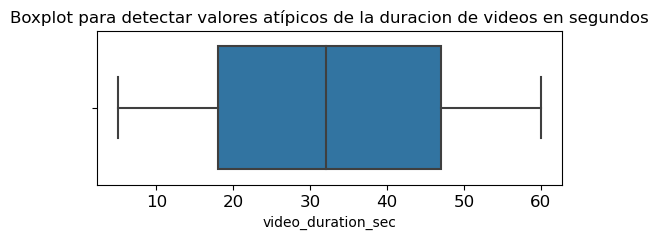

In [12]:
#Cree un diagrama de caja para visualizar la distribución de `video_duration_sec`
fig=plt.figure(figsize=(6,2))
sns.boxplot(x=data["video_duration_sec"])
plt.title('Boxplot para detectar valores atípicos de la duracion de videos en segundos', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

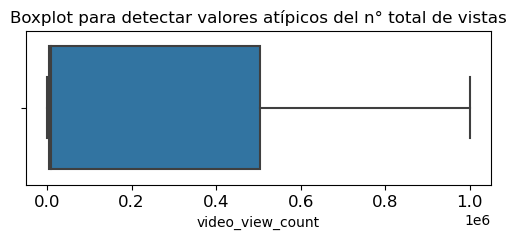

In [13]:
# Cree un diagrama de caja para visualizar la distribución de `video_view_count`
fig=plt.figure(figsize=(6,2))
sns.boxplot(x=data["video_view_count"])
plt.title('Boxplot para detectar valores atípicos del n° total de vistas', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



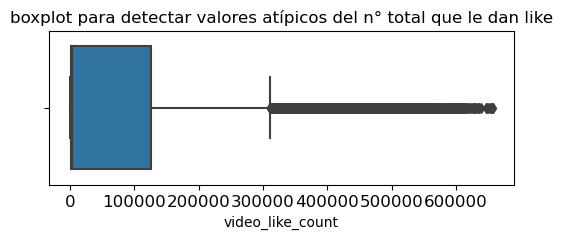

In [14]:
# Cree un diagrama de caja para visualizar la distribución de `video_like_count`
fig=plt.figure(figsize=(6,2))
sns.boxplot(x=data["video_like_count"])
plt.title("boxplot para detectar valores atípicos del n° total que le dan like",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




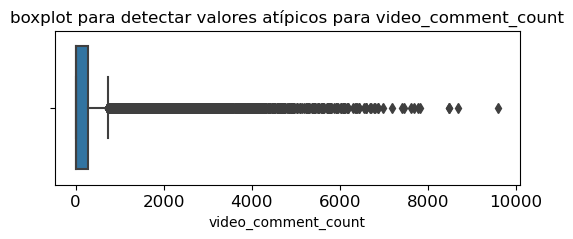

In [15]:
#Cree un diagrama de caja para visualizar la distribución de `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('boxplot para detectar valores atípicos para video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()



In [16]:
# Busque y maneje valores atípicos para video_like_count
quartil25 = data["video_like_count"].quantile(0.25) #calcular primer cuartil Q1 de la columna 

quartil75 = data["video_like_count"].quantile(0.75) #calcular tercer cuartil Q3 

iqr = quartil75 - quartil25  # calcular rango intercuartil IQR
limite_superior = quartil75+ 1.5 * iqr  #  límite superior para identificar valores atípicos
 
data.loc[data["video_like_count"] > limite_superior, "video_like_count"] = limite_superior  #sustituyendo valores atipicos

In [17]:
print(quartil25)
print(quartil75)
print(iqr)
print(limite_superior)
print(percentile25)

810.75
125020.0
124209.25
311333.875


NameError: name 'percentile25' is not defined

Consultar saldo de clases.

In [ ]:
# Verificar el saldo de clases para video_comment_count
quartil25 = data["video_comment_count"].quantile(0.25)
quartil75 = data["video_comment_count"].quantile(0.75)

iqr = quartil75 - quartil25 
limite_superior = quartil75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = limite_superior 

In [18]:
print(quartil25)
print(quartil75)
print(iqr)
print(limite_superior)
print(percentile25)

810.75
125020.0
124209.25
311333.875


NameError: name 'percentile25' is not defined

In [19]:
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Aproximadamente el 94,2 % del conjunto de datos representa vídeos publicados por cuentas no verificadas y el 5,8 % representa vídeos publicados por cuentas verificadas. Por tanto, la variable de resultado no está muy equilibrada.

Utilice el remuestreo para crear un equilibrio de clases en la variable de resultado, si es necesario.

In [20]:
# Utilice el remuestreo para crear un equilibrio de clases en la variable de resultado, si es necesario

# Identificar puntos de datos de clases mayoritarias y minoritarias.
mayoria_de_datos = data[data["verified_status"] == "not verified"]
minoria_de_datos= data[data["verified_status"] == "verified"]

# Ampliar la muestra de la clase minoritaria (que está "verificada")
minoria_de_datos_sobremuestreados  = resample(minoria_de_datos,
                                 replace=True,                    # para muestrear con reemplazo
                                 n_samples=len(mayoria_de_datos), # para coincidir con la clase mayoritaria
                                 random_state=0)                  # para crear resultados reproducibles


#Combinar clase mayoritaria con clase minoritaria muestreada
datos_sobremuestreados = pd.concat([mayoria_de_datos, minoria_de_datos_sobremuestreados]).reset_index(drop=True)

# Mostrar nuevos recuentos de clases
datos_sobremuestreados["verified_status"].value_counts()


verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Obtén la longitud media de `video_transcription_text` de los vídeos publicados por cuentas verificadas y la longitud media de `video_transcription_text` de los vídeos publicados por cuentas no verificadas.



In [21]:
# Obtenga la longitud media de `video_transcription_text` para las reclamaciones y la longitud media de `video_transcription_text` para las opiniones

datos_sobremuestreados[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extraiga la longitud de cada `video_transcription_text` y añádala como columna al marco de datos, para poder utilizarla como característica potencial en el modelo.

In [22]:
# Extrae la longitud de cada `video_transcription_text` y añádela como columna al dataframe
datos_sobremuestreados["text_length"] = datos_sobremuestreados["video_transcription_text"].apply(func=lambda text: len(text))


In [23]:
# Mostrar las primeras filas del marco de datos después de añadir una nueva columna
datos_sobremuestreados.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

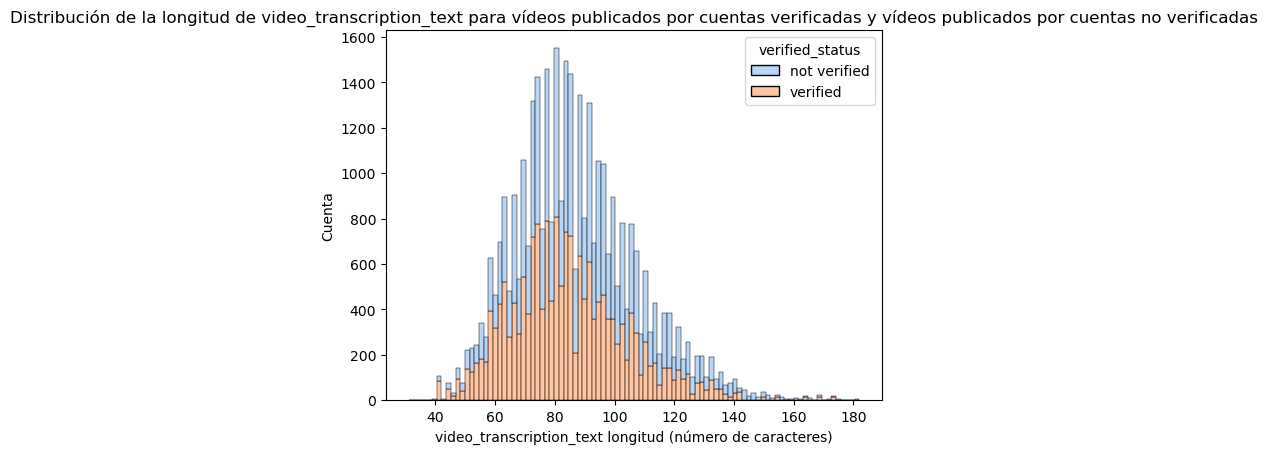

In [24]:
# Visualizar la distribución de la longitud de `video_transcription_text` para vídeos publicados por cuentas verificadas y vídeos publicados por cuentas no verificadas.
# Crear dos histogramas en un gráfico
sns.histplot(data=datos_sobremuestreados, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Histograma apilado Seaborn")
plt.xlabel("video_transcription_text longitud (número de caracteres)")
plt.ylabel("Cuenta")
plt.title("Distribución de la longitud de video_transcription_text para vídeos publicados por cuentas verificadas y vídeos publicados por cuentas no verificadas")
plt.show()


### **Tarea 2b. Examinar correlaciones**

A continuación, codifique una matriz de correlaciones para ayudar a determinar las variables más correlacionadas.

In [25]:
#Codifica una matriz de correlación para ayudar a determinar las variables más correlacionadas.
datos_sobremuestreados.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.686647,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.686647,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.149750,1.000000


Visualice un mapa térmico de correlación de los datos.

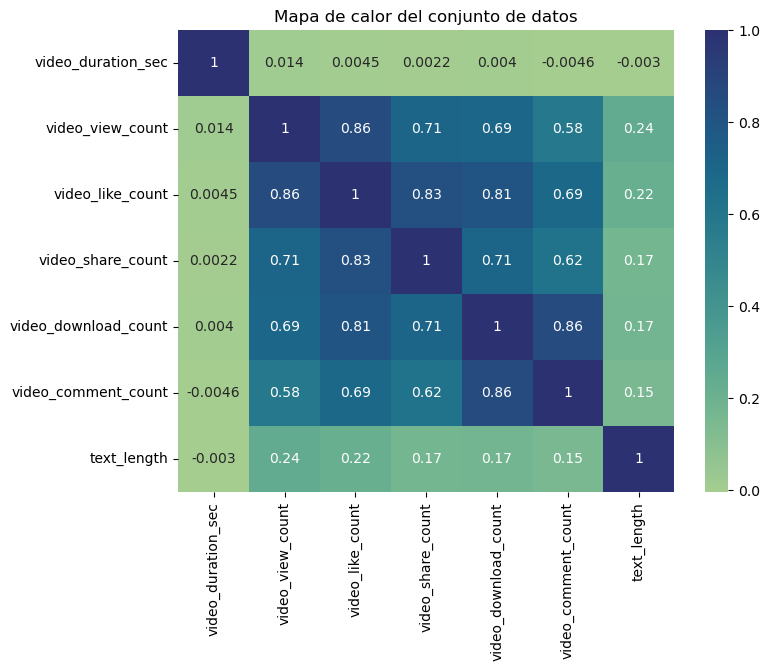

In [26]:
# Crear un mapa de calor para visualizar cómo están correlacionadas las variables
plt.figure(figsize=(8, 6))
sns.heatmap(
datos_sobremuestreados[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Mapa de calor del conjunto de datos")
plt.show()

Uno de los supuestos del modelo de regresión logística es la ausencia de multicolinealidad grave entre las características. Tenga esto en cuenta cuando examine el mapa de calor y elija con qué características proceder.

**Pregunta:** ¿Qué variables se muestran correlacionadas en el mapa térmic


 El mapa de calor anterior muestra que el siguiente par de variables está fuertemente correlacionado: `video_view_count` y `video_like_count` (coeficiente de correlación de 0,86).

Uno de los supuestos del modelo de regresión logística es la ausencia de multicolinealidad grave entre las características. Para construir un modelo de regresión logística que cumpla este supuesto, podría excluir `video_like_count`. Y entre las variables que cuantifican las métricas de vídeo, podría mantener `video_view_count`, `video_share_count`, `video_download_count`, y `video_comment_count` como características.o?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Tras el análisis y la obtención de variables con relaciones estrechas, es hora de empezar a construir el modelo. Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa de Construcción.

### **Tarea 3a. Seleccionar variables**

Establece tus variables Y y X.

Seleccione la variable de resultado.

In [27]:
# Seleccionar variable de resultado
y = datos_sobremuestreados["verified_status"]

In [28]:
y.sample(5)

17128    not verified
26565        verified
32478        verified
20611        verified
14632    not verified
Name: verified_status, dtype: object

Seleccione las características.

In [29]:
# Seleccione las características.
X = datos_sobremuestreados[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Mostrar las primeras filas del marco de datos de características
X.head()


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Tarea 3b. División tren-prueba**

Divida los datos en conjuntos de entrenamiento y prueba.

In [30]:
# Divida los datos en conjuntos de entrenamiento y prueba.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)


Confirme que las dimensiones de los conjuntos de entrenamiento y prueba están alineadas.

In [31]:
# Obtener la forma de cada conjunto de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

- El número de características (`7`) coincide con los conjuntos de entrenamiento y prueba.
- El número de filas se alinea entre las características y la variable de resultado para el entrenamiento (`26826`) y la prueba (`8942`).

### **Tarea 3c. Codificar variables**

Compruebe los tipos de datos de las características.

In [32]:
# Comprobar tipos de datos
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
# Obtener valores únicos en `claim_status`.
data["claim_status"].unique()

array(['claim', 'opinion'], dtype=object)

In [34]:
# Obtener valores únicos en `author_ban_status`.
data["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

Como se muestra arriba, las características `claim_status` y `author_ban_status` son actualmente de tipo `object`. Con el fin de trabajar con las implementaciones de modelos a través de `sklearn`, estas características categóricas tendrán que ser numéricas. Una forma de hacerlo es a través de la codificación one-hot.

Codifique las características categóricas en el conjunto de entrenamiento utilizando un método apropiado.

In [35]:
# Seleccione las funciones de entrenamiento que deben codificarse
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]
# Mostrar las primeras filas
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [36]:
# Configure un codificador para codificar en caliente las características categóricas
#Cuando drop se establece en 'first', se elimina la primera categoría para evitar la multicolinealidad. 
X_encoder = OneHotEncoder(drop='first', sparse_output=False) # sparse_output=False controla si la salida debe ser una matriz dispersa

In [37]:
# Ajustar y transformar las funciones de entrenamiento usando el codificador.
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [38]:
# Obtener nombres de funciones del codificador
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [39]:
# Mostrar las primeras filas de funciones de entrenamiento codificadas
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [40]:
# Coloque funciones de entrenamiento codificadas (que actualmente son una matriz) en un marco de datos
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Mostrar las primeras filas
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [41]:
# Mostrar las primeras filas de `X_train` con las columnas `claim_status` y `author_ban_status` eliminadas (ya que estas características se están transformando en numéricas)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [43]:
# Concatenar `X_train` y `X_train_encoded_df` para formar el marco de datos final para los datos de entrenamiento (`X_train_final`)
# Nota: Usar `.reset_index(drop=True)` para restablecer el índice en X_train después de eliminar `claim_status` y `author_ban_status
# para que los índices se alineen con los de `X_train_encoded_df` y `count_df`.
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Mostrar las primeras filas
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


Compruebe el tipo de datos de la variable de resultado.

In [44]:
# Verificar el tipo de datos de la variable de resultado
y_train.dtype

dtype('O')

In [45]:
# Obtener valores únicos de la variable de resultado
y_train.unique()

array(['verified', 'not verified'], dtype=object)

Como se muestra arriba, la variable de resultado es de tipo `object` actualmente. Se puede utilizar una codificación en caliente para convertir esta variable en numérica.

Codifique los valores categóricos de la variable de resultado del conjunto de entrenamiento utilizando un método adecuado.

In [46]:
# Configure un codificador para codificar en caliente la variable de resultado categórico
y_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [47]:
# Codificar la variable de resultado del entrenamiento
# Notas:
# - Ajustando la forma de `y_train` antes de pasar a `.fit_transform()`, ya que toma una matriz 2D
# - Usando `.ravel()` para aplanar la matriz devuelta por `.fit_transform()`, para que pueda usarse más adelante para entrenar el modelo
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Mostrar la variable de resultado del entrenamiento codificada
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **Tarea 3d. Construcción de modelos**

Construir un modelo y ajustarlo al conjunto de entrenamiento.

In [48]:
# Construir un modelo de regresión logística y ajustarlo al conjunto de entrenamiento.
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa Ejecutar.

### **Taks 4a. Resultados y evaluación**

Evalúe su modelo.

Codifique las características categóricas en el conjunto de pruebas utilizando un método adecuado.

In [49]:
# Seleccione las características de prueba que deben codificarse
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Mostrar las primeras filas
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [50]:
# Transformar las características de prueba utilizando el codificador
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Mostrar las primeras filas de las características de prueba codificadas
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [51]:
# Coloque las características de prueba codificadas (que actualmente es una matriz) en un marco de datos
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Mostrar las primeras filas
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [52]:
# Mostrar las primeras filas de `X_test` con las columnas `claim_status` y `author_ban_status` eliminadas (ya que estas características están siendo transformadas a numéricas)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,1789.0
5727,19,792813.0,56597.0,5146.0,3413.0
11607,54,2044.0,68.0,19.0,2.0


In [53]:
# Concatenar `X_test` y `X_test_encoded_df` para formar el marco de datos final para los datos de entrenamiento (`X_test_final`)
# Nota: Usar `.reset_index(drop=True)` para restablecer el índice en X_test después de eliminar `claim_status`, y `author_ban_status`,
# para que los índices coincidan con los de `X_test_encoded_df` y `test_count_df`.
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Mostrar las primeras filas
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Pruebe el modelo de regresión logística. Utiliza el modelo para hacer predicciones sobre el conjunto de pruebas codificado.

In [54]:
# Utilizar el modelo de regresión logística para obtener predicciones sobre el conjunto de pruebas codificado.
y_pred = log_clf.predict(X_test_final)


Mostrar las predicciones en el conjunto de pruebas codificado.

In [55]:
# Mostrar las predicciones sobre el conjunto de pruebas codificado
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Muestra las etiquetas verdaderas del conjunto de pruebas.

In [56]:
# Mostrar las etiquetas verdaderas del conjunto de pruebas
y_test


21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Codificar las etiquetas verdaderas del conjunto de pruebas para poder compararlas con las predicciones.

In [57]:
# Codificar la variable de resultado de la prueba
# Notas:
# - Ajustar la forma de `y_test` antes de pasarlo a `.transform()`, ya que toma en 2D array
# - Usar `.ravel()` para aplanar el array devuelto por `.transform()`, de forma que pueda ser usado posteriormente para comparar con predicciones
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Mostrar la variable codificada de resultado de la prueba
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirme de nuevo que las dimensiones de los conjuntos de entrenamiento y prueba están alineadas desde que se añadieron características adicionales.

In [58]:
# Obtener la forma de cada conjunto de entrenamiento y prueba
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape


((26826, 8), (26826,), (8942, 8), (8942,))


- The number of features (`8`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`26826`) and testing (`8942`).

### **Tarea 4b. Visualizar los resultados del modelo**

Cree una matriz de confusión para visualizar los resultados del modelo de regresión logística.

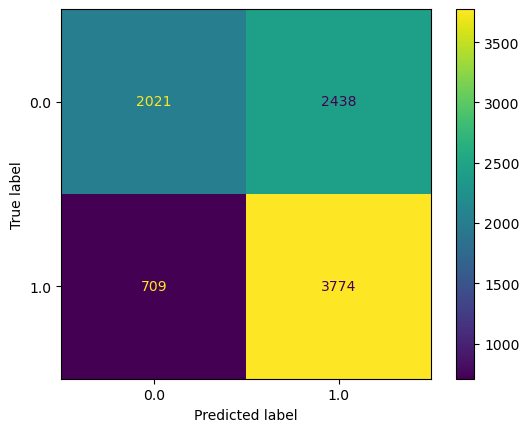

In [59]:
# Calcular los valores de la matriz de confusión
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Crear la visualización de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Trazar matriz de confusión
log_disp.plot()

# Mostrar gráfico
plt.show()

In [60]:
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571

El cuadrante superior izquierdo muestra el número de verdaderos negativos: el número de vídeos publicados por cuentas no verificadas que el modelo clasificó correctamente como tales.

El cuadrante superior derecho muestra el número de falsos positivos: el número de vídeos publicados por cuentas no verificadas que el modelo clasificó erróneamente como publicados por cuentas verificadas.

El cuadrante inferior izquierdo muestra el número de falsos negativos: el número de vídeos publicados por cuentas verificadas que el modelo clasificó erróneamente como publicados por cuentas no verificadas.

El cuadrante inferior derecho muestra el número de verdaderos positivos: el número de vídeos publicados por cuentas verificadas que el modelo clasificó correctamente como tales.

Un modelo perfecto arrojaría todos los verdaderos negativos y verdaderos positivos, y ningún falso negativo o falso positivo.

Cree un informe de clasificación que incluya métricas de precisión, recuperación, puntuación f1 y exactitud para evaluar el rendimiento del modelo de regresión logística.

In [61]:
# Crear un informe de clasificación
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



El informe de clasificación anterior muestra que el modelo de regresión logística obtuvo una precisión del 61% y una recuperación del 84%, y alcanzó una exactitud del 65%. Tenga en cuenta que las puntuaciones de precisión y recuperación se toman de la fila "no verificado" del resultado porque es la clase objetivo que más nos interesa predecir. La clase "verificada" tiene sus propias métricas de precisión/recuperación, y la media ponderada representa las métricas combinadas para ambas clases de la variable objetivo.

### **Tarea 4c. Interpretar los coeficientes del modelo**

In [62]:
# Obtenga los nombres de las características del modelo y los coeficientes del modelo (que representan log-odds ratios)
# Colocar en un DataFrame para facilitar la lectura
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})


,Feature Name,Model Coefficient
0,video_duration_sec,8.493546e-03
1,video_view_count,-2.277453e-06
2,video_share_count,5.458611e-06
3,video_download_count,-2.143023e-04
4,video_comment_count,3.899371e-04
5,claim_status_opinion,3.772015e-04
6,author_ban_status_banned,-1.675961e-05
7,author_ban_status_under review,-7.084767e-07


### **Tarea 4d. Conclusión**

1. ¿Cuáles son las principales conclusiones de este proyecto?

2. ¿Qué resultados se pueden presentar de este proyecto?

Principales conclusiones:

- El conjunto de datos tiene algunas variables muy correlacionadas, lo que podría provocar problemas de multicolinealidad al ajustar un modelo de regresión logística. Decidimos eliminar `video_like_count` de la construcción del modelo.
- Según el modelo de regresión logística, cada segundo adicional del vídeo se asocia con un aumento de 0,009 en las probabilidades logarítmicas de que el usuario tenga un estado verificado.
- El modelo de regresión logística no tiene un gran poder predictivo, pero es aceptable: una precisión del 61% es inferior a la ideal, pero un recuerdo del 84% es muy bueno. La precisión global se sitúa en el extremo inferior de lo que suele considerarse aceptable. 


Desarrollamos un modelo de regresión logística para el estado verificado basado en las características del vídeo. El modelo tenía un poder predictivo decente. Según los coeficientes estimados del modelo de regresión logística, los vídeos más largos tienden a asociarse con mayores probabilidades de que el usuario sea verificado. Otras características del vídeo tienen coeficientes estimados pequeños en el modelo, por lo que su asociación con el estado verificado parece ser pequeña.

**¡Felicidades!** Has completado este laboratorio. Sin embargo, es posible que no veas una marca de verificación verde junto a este elemento en la plataforma de Coursera. Por favor, continúa tu progreso independientemente de la marca de verificación. Simplemente haga clic en el icono "guardar" en la parte superior de este cuaderno para asegurarse de que su trabajo ha sido registrado. 